In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np

In [2]:
titanic_data = pd.read_csv("titanic_train (3).csv")

titanic_data = titanic_data.dropna()
print(titanic_data)

     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ... 

## Histogram of Numerical Data

In [6]:
age_counts = titanic_data["Age"].value_counts()
print(age_counts)

Age
36.0    11
24.0     9
19.0     6
35.0     6
31.0     5
        ..
71.0     1
3.0      1
1.0      1
36.5     1
26.0     1
Name: count, Length: 63, dtype: int64


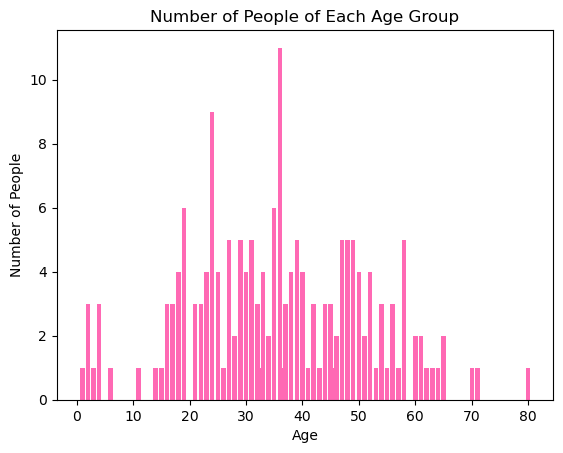

In [8]:
plt.bar(age_counts.index, age_counts, color ="hotpink")
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.title("Number of People of Each Age Group")
plt.show()

## Pie Chart of Categorical Data

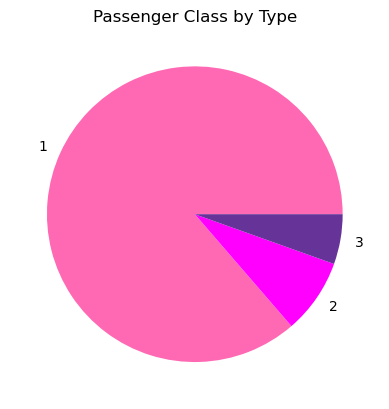

In [11]:
pclass_level = titanic_data["Pclass"].value_counts()
pie_colors = ["hotpink", "magenta", "rebeccapurple"]
plt.pie(pclass_level, labels = pclass_level.index, colors=pie_colors) 
plt.title("Passenger Class by Type")
plt.show()

## Scatter Plot of two Numerical Data Points w/ Linear Regression

LinregressResult(slope=-0.4510625474955362, intercept=94.77386642798255, rvalue=-0.09242385620999939, pvalue=0.21335794745107722, stderr=0.3612023106774366, intercept_stderr=14.063985642433588)


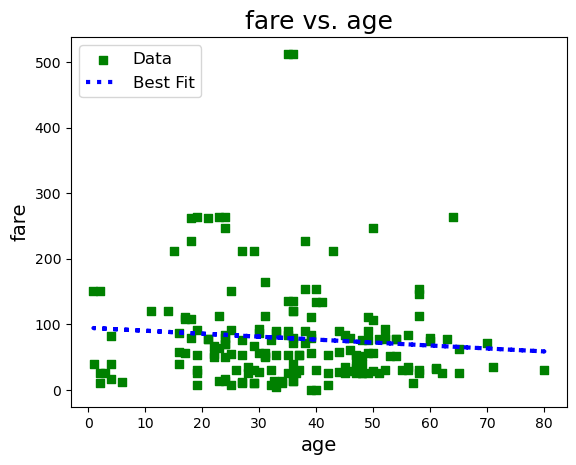

In [14]:
fare = titanic_data["Fare"]
age = titanic_data["Age"]

linear_model=scipy.stats.linregress(age, fare) 
print(linear_model)

slope=linear_model.slope
yint=linear_model.intercept

linear_fit=slope*age+yint

plt.scatter(age, fare,  s=30, color="green", marker="s", label="Data")
plt.plot(age, linear_fit, linewidth=3, color="blue", linestyle=":", label="Best Fit")
plt.title("fare vs. age", fontsize=18)
plt.xlabel("age", fontsize=14)
plt.ylabel("fare", fontsize=14)
plt.legend(fontsize=12, loc="upper left")

## Figure of my choice

Sex         female      male
Survived  0.931818  0.431579


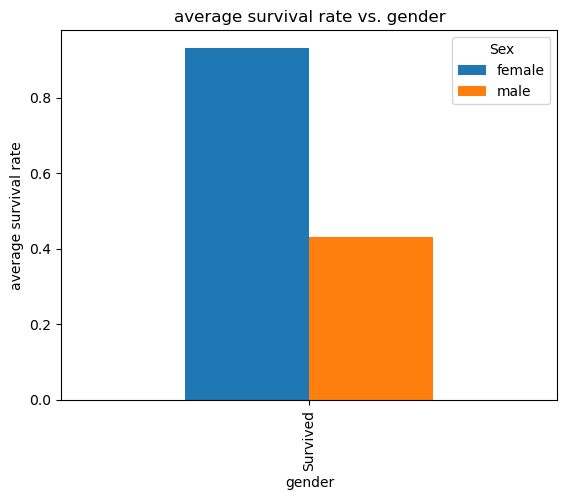

In [17]:
titanic_pt = pd.pivot_table(titanic_data, values="Survived", columns=["Sex"], aggfunc="mean")
print(titanic_pt)

titanic_pt.plot(kind="bar", xlabel="gender", ylabel="average survival rate", title="average survival rate vs. gender")
plt.show()

## Contingency table and Chi Squared

In [20]:
titanic_type = pd.crosstab(titanic_data["Survived"], titanic_data["Pclass"])
print(titanic_type)

Pclass      1   2  3
Survived            
0          52   3  5
1         106  12  5


In [22]:
c, p , dof, expected = scipy.stats.chi2_contingency(titanic_type)
print("the p-value is:", p)

the p-value is: 0.29250449664842587


## Two Columns of Data in Comparison

In [25]:
corr_scores = titanic_data.corr(numeric_only=True)
print(corr_scores)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000  0.148495 -0.089136  0.030933 -0.083488 -0.051454   
Survived        0.148495  1.000000 -0.034542 -0.254085  0.106346  0.023582   
Pclass         -0.089136 -0.034542  1.000000 -0.306514 -0.103592  0.047496   
Age             0.030933 -0.254085 -0.306514  1.000000 -0.156162 -0.271271   
SibSp          -0.083488  0.106346 -0.103592 -0.156162  1.000000  0.255346   
Parch          -0.051454  0.023582  0.047496 -0.271271  0.255346  1.000000   
Fare            0.029740  0.134241 -0.315235 -0.092424  0.286433  0.389740   

                 Fare  
PassengerId  0.029740  
Survived     0.134241  
Pclass      -0.315235  
Age         -0.092424  
SibSp        0.286433  
Parch        0.389740  
Fare         1.000000  


The correlation score between Fare and Age is -0.09.